#MEDICAL IMAGE CLASSIFICATION AND SEGMENTATION USING DEEP LEARNING WITH TENSORFLOW 2.0


In [58]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tqdm import tqdm
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import cv2
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Model
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D, InputLayer, BatchNormalization, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [59]:
classes = {'CT_COVID': 1, 'CT_NonCOVID': 0}

In [60]:
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
BATCH_SIZE=32
N_CLASSES = 2
EPOCHS = 5

In [61]:
root_path = 'E:\Data\Study\CE 888'
os.chdir(root_path)
cwd_path = os.getcwd()

#Define Train-val-test Directories
Covid_dir = os.path.join(root_path,"CT_COVID")
NonCOVID_dir = os.path.join(root_path, "CT_NonCOVID")

In [62]:
def count_of_images(dir_path):
    path, dirs, files = next(os.walk(dir_path))
    return len(files)

In [63]:
covidCT_count = count_of_images(Covid_dir)
noncovidCT_count = count_of_images(NonCOVID_dir)

In [64]:
Classes = ["CT_COVID","CT_NonCOVID"]
number_of_classes = [covidCT_count,noncovidCT_count]

<AxesSubplot:>

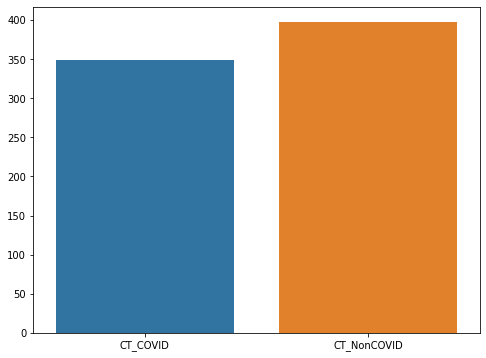

In [65]:
plt.figure(figsize=(8, 6))
sns.barplot(Classes, number_of_classes)

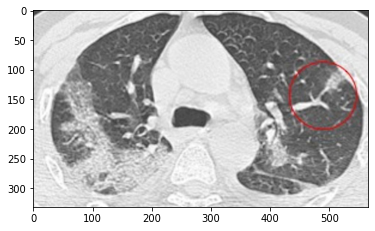

In [71]:
CTcovid_img = np.asarray(Image.open(root_path+"\CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%1.png"))
plt.imshow(CTcovid_img, cmap="gray")

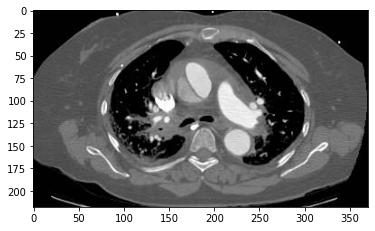

In [72]:
CTnoncovid_img = np.asarray(Image.open(root_path+"/CT_NonCOVID/102.png"))
plt.imshow(CTnoncovid_img, cmap="gray")

In [73]:
def assign_label(img,class_type):
    return class_type

X = []
y = []

def make_train_data(class_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,class_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMAGE_WIDTH,IMAGE_HEIGHT))
        
        X.append(np.array(img))
        y.append(str(label))

In [74]:
make_train_data(classes.get('CT_COVID'), Covid_dir)

100%|██████████| 349/349 [00:01<00:00, 319.00it/s]


In [75]:
make_train_data(classes.get('CT_NonCOVID'), NonCOVID_dir)

100%|██████████| 397/397 [00:00<00:00, 416.96it/s]


In [76]:
len(X)
y = np.array(y)
X = np.array(X)
X.shape,y.shape

((746, 224, 224, 3), (746,))

In [77]:
X.shape, y.shape

((746, 224, 224, 3), (746,))

In [78]:
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=58954)

In [80]:
k = len(set(y_train))
print("Number of classes, ", k)

Number of classes,  2


In [81]:
X_train = X_train.astype('float64')/255
X_test = X_test.astype('float64')/255

In [82]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [83]:
y_train.shape

(522, 2)

In [84]:
i = layers.Input(shape = (X_train[0].shape))
x = layers.Conv2D(64, (3,3), activation='relu', strides = (2,2), padding= 'same')(i)
x = layers.Conv2D(64, (3,3), activation='relu', strides = (2,2), padding= 'same')(x)
x = layers.Conv2D(32, (3,3), activation='relu', strides = (2,2), padding= 'same')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(2, activation='sigmoid')(x)

In [85]:
model = Model(i, x)

In [86]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0   

In [87]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                              patience=3, min_lr=0.00001)

In [88]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = BATCH_SIZE, validation_data=  (X_test,y_test), callbacks=[reduce_lr])

Epoch 1/50
17/17 [==============================] - 8s 435ms/step - loss: 0.7018 - accuracy: 0.5381 - val_loss: 0.6684 - val_accuracy: 0.5804
Epoch 2/50
17/17 [==============================] - 8s 446ms/step - loss: 0.6749 - accuracy: 0.5759 - val_loss: 0.6288 - val_accuracy: 0.6295
Epoch 3/50
17/17 [==============================] - 7s 404ms/step - loss: 0.6056 - accuracy: 0.6657 - val_loss: 0.5894 - val_accuracy: 0.6741
Epoch 4/50
17/17 [==============================] - 7s 405ms/step - loss: 0.5696 - accuracy: 0.6776 - val_loss: 0.5549 - val_accuracy: 0.7009
Epoch 5/50
17/17 [==============================] - 7s 397ms/step - loss: 0.4810 - accuracy: 0.7482 - val_loss: 0.5170 - val_accuracy: 0.7277
Epoch 6/50
17/17 [==============================] - 7s 415ms/step - loss: 0.3679 - accuracy: 0.8561 - val_loss: 0.6957 - val_accuracy: 0.6830
Epoch 7/50
17/17 [==============================] - 8s 497ms/step - loss: 0.2920 - accuracy: 0.8742 - val_loss: 0.5778 - val_accuracy: 0.7500
Epoch 

In [89]:
# Evaluate Test Set
test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy[1]*100,'%')


7/7 [==============================] - 1s 69ms/step - loss: 1.2830 - accuracy: 0.7366
Test Accuracy: 73.66071343421936 %


In [92]:
# use vgg16 pre-trained model with trainable densely connected output layer
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the layers except for the last layer: 
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

    
from tensorflow.keras import models
from tensorflow.keras import layers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))
#model.summary() 

In [93]:
aug = ImageDataGenerator(rotation_range=60, width_shift_range=0.3, height_shift_range=0.3,
                         shear_range=0.4, zoom_range=0.3, horizontal_flip=True, vertical_flip=True, fill_mode='nearest')

In [95]:
# Compile the model using Adam optimizer and loss as categorical_crossentropy
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])


In [96]:
history = model.fit_generator(aug.flow(X_train, y_train,batch_size=32), validation_data=(X_test,y_test), epochs=30,
                    steps_per_epoch=len(X_train)//32, verbose=1)

Epoch 1/30
16/16 [==============================] - 81s 5s/step - loss: 0.9213 - accuracy: 0.5473 - val_loss: 0.6955 - val_accuracy: 0.4688
Epoch 2/30
16/16 [==============================] - 84s 5s/step - loss: 0.7182 - accuracy: 0.4744 - val_loss: 0.6733 - val_accuracy: 0.6518
Epoch 3/30
16/16 [==============================] - 93s 6s/step - loss: 0.6813 - accuracy: 0.5664 - val_loss: 0.6925 - val_accuracy: 0.5446
Epoch 4/30
16/16 [==============================] - 85s 5s/step - loss: 0.6596 - accuracy: 0.6327 - val_loss: 0.6207 - val_accuracy: 0.7098
Epoch 5/30
16/16 [==============================] - 88s 6s/step - loss: 0.6920 - accuracy: 0.5188 - val_loss: 0.6262 - val_accuracy: 0.7321
Epoch 6/30
16/16 [==============================] - 91s 6s/step - loss: 0.6421 - accuracy: 0.6138 - val_loss: 0.5500 - val_accuracy: 0.7277
Epoch 7/30
16/16 [==============================] - 91s 6s/step - loss: 0.5658 - accuracy: 0.7125 - val_loss: 0.6368 - val_accuracy: 0.6786
Epoch 8/30
16/16 [==

In [97]:
test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy[1]*100,'%')

7/7 [==============================] - 20s 3s/step - loss: 0.3911 - accuracy: 0.8214
Test Accuracy: 82.14285969734192 %
